In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
Water_Hardness = pd.read_csv('water.csv')
Water_Hardness

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

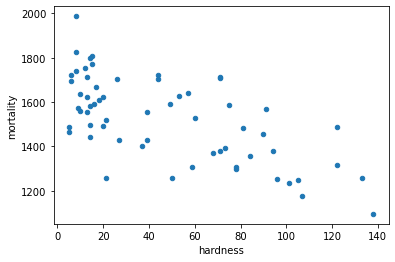

In [26]:
#Построим точечный график, что бы посмотреть взаимосвязь между жесткостью воды и смертностью
Water_Hardness[['mortality', 'hardness']].plot(kind='scatter',
                                               x = 'hardness',
                                               y = 'mortality')
#На основании графика видна не очень явная обратная линейная корреляция между этими двумя показателями.
#Чем выше жесткость воды, тем ниже смертность 

In [4]:
#Посчитаем корреляцию Пирсона
Water_Hardness[['mortality', 'hardness']].corr()
#Корреляция выше среднего

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
#Посчитаем корреляцию Спирмена
Water_Hardness[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
Water_Hardness[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [7]:
#Проведем регрессионный анализ
hardness = Water_Hardness[['hardness']]
mortality = Water_Hardness['mortality']

In [8]:
hardness_train, hardness_test, mortality_train, mortality_test = train_test_split(hardness, mortality, test_size=0.30, random_state=50)

In [9]:
hardness_train.shape

(42, 1)

In [10]:
mortality_train.shape

(42,)

In [37]:
model = LinearRegression()
model.fit(hardness_train, mortality_train)

LinearRegression()

In [12]:
model.coef_ #коеф "а" для нашей модели регрессии (у = ах + в)

array([-3.43995111])

In [13]:
model.intercept_ # коеф "в"

1678.3265982907678

In [14]:
mortality_pred = model.predict(hardness_test)
mortality_pred #спрогнозированная смертность, на наших тестовых х (жесткости воды)

array([1619.84742945, 1657.68689164, 1647.36703832, 1544.16850508,
       1509.76899399, 1434.09006962, 1399.69055854, 1330.89153637,
       1643.92708721, 1220.81310091, 1420.33026518, 1203.61334537,
       1258.6525631 , 1258.6525631 , 1650.80698943, 1410.01041186,
       1434.09006962, 1630.16728278, 1544.16850508])

In [15]:
model.score(hardness_test, mortality_test) #посмотрим коэффициент детерминации
#наша модель получилась не слишком хорошая

0.5403737075686553

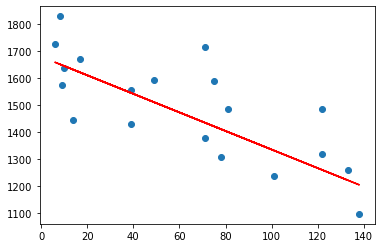

In [16]:
#Визуализируем полученную модель регрессии
plt.scatter(hardness_test, mortality_test)
plt.plot(hardness_test, mortality_pred, c='r')

In [17]:
hardness_const = sm.add_constant(hardness_train) #добавим константу

In [18]:
hardness_const.shape

(42, 2)

In [19]:
model = sm.OLS(mortality_train, hardness_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     22.40
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           2.77e-05
Time:                        23:19:18   Log-Likelihood:                -269.31
No. Observations:                  42   AIC:                             542.6
Df Residuals:                      40   BIC:                             546.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1678.3266     37.468     44.794      0.0

In [20]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1678.326598
hardness      -3.439951
dtype: float64
R2:  0.3589307358630728


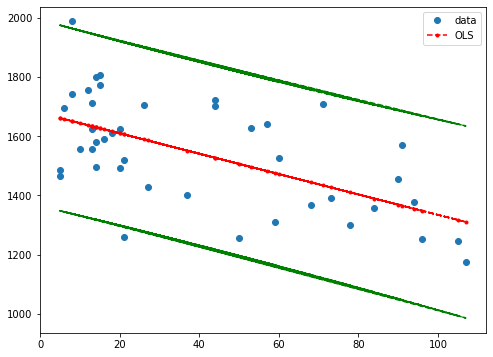

In [21]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(hardness_const.iloc[:, 1], mortality_train, 'o', label="data")
ax.plot(hardness_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(hardness_const.iloc[:, 1], iv_u, 'g--')
ax.plot(hardness_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

In [24]:
### Задание 2
#Теперь посмотрим данныые для разных регионов
WH_South = Water_Hardness.loc[Water_Hardness['location'] == 'South'] 
WH_North = Water_Hardness.loc[Water_Hardness['location'] == 'North']

<AxesSubplot:title={'center':'North'}, xlabel='hardness', ylabel='mortality'>

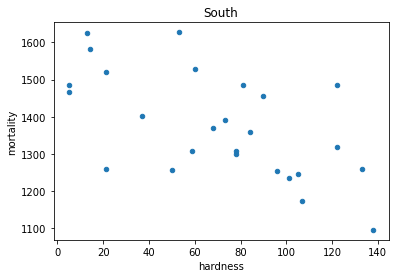

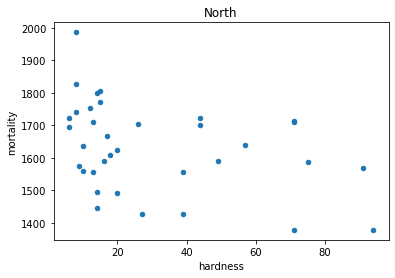

In [28]:
#Построим точечные графики по Южным и Северным регионам
WH_South[['mortality', 'hardness']].plot(kind='scatter',
                                         x = 'hardness',
                                         y = 'mortality',
                                        title = 'South')
WH_North[['mortality', 'hardness']].plot(kind='scatter',
                                         x = 'hardness',
                                         y = 'mortality',
                                        title = 'North')
#Линейная зависимость в них не наблюдается

In [30]:
#Посчитаем корреляцию Пирсона по Югу
WH_South[['mortality', 'hardness']].corr()
#Корреляция выше среднего, но ниже, чем когда смотрели оба региона вместе

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [32]:
#Посчитаем корреляцию Спирмена по Югу
WH_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [31]:
#Посчитаем корреляцию Пирсона по Северу
WH_North[['mortality', 'hardness']].corr()
#Корреляция по Северным регионам низкая

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [34]:
#Посчитаем корреляцию Спирмена по Северу
WH_North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [43]:
#Проведем регрессионный анализ по Южным городам
hardness_s = WH_South[['hardness']]
mortality_s = WH_South['mortality']
hardness_s_train, hardness_s_test, mortality_s_train, mortality_s_test = train_test_split(hardness_s, mortality_s, test_size=0.30, random_state=50)
hardness_s_train.shape
mortality_s_train.shape
model_s = LinearRegression()
model_s.fit(hardness_s_train, mortality_s_train)
model_s.coef_
model_s.intercept_
mortality_pred_s = model.predict(hardness_s_test)
mortality_pred_s
model_s.score(hardness_s_test, mortality_s_test) #посмотрим коэффициент детерминации
# Наша модель получилась совсем плохая

0.045758667765418704

In [44]:
#Проведем регрессионный анализ по Южным городам
hardness_n = WH_North[['hardness']]
mortality_n = WH_North['mortality']
hardness_n_train, hardness_n_test, mortality_n_train, mortality_n_test = train_test_split(hardness_n, mortality_n, test_size=0.30, random_state=50)
hardness_n_train.shape
mortality_n_train.shape
model_n = LinearRegression()
model_n.fit(hardness_n_train, mortality_n_train)
model_n.coef_
model_n.intercept_
mortality_pred_n = model.predict(hardness_n_test)
mortality_pred_n
model_s.score(hardness_n_test, mortality_n_test) #посмотрим коэффициент детерминации
# Наша модель получилась совсем ни о чем)

-0.8724665542500645

In [ ]:
# Проведя анализ данных по регионам в отдельности мы увидели, что при анализе общих данных, небольшая зависимость между жесткостью воды и смертностью прослеживалась
# При просмотре данных в отдельности мы увидели, что жествость воды на смертность не влияет. Либо у нас очень мало данных.